In [1]:
from os import listdir
import glob
from numpy import asarray
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import savez_compressed
 
# load all images in a directory into memory
trainX, trainY, testX, testY = list(), list(), list(), list()
# enumerate filenames in directory, assume all are images
for filename in sorted(glob.glob("places/*.png"))[0:1900]:
    # load and resize the image
    pixels = load_img(filename, target_size=(256,256))
    # convert to numpy array
    pixels = img_to_array(pixels)
    # split into satellite and map
    trainX.append(pixels)
    trainX.append(pixels)
trainX = asarray(trainX)
for filename in sorted(glob.glob("places/*.png"))[1900:2000]:
    # load and resize the image
    pixels = load_img(filename, target_size=(256,256))
    # convert to numpy array
    pixels = img_to_array(pixels)
    # split into satellite and map
    testX.append(pixels)
    testX.append(pixels)
testX = asarray(testX)
for filename in sorted(glob.glob("placesMongrels/*.png"))[0:3800]:
    # load and resize the image
    pixels = load_img(filename, target_size=(256,256))
    # convert to numpy array
    pixels = img_to_array(pixels)
    # split into satellite and map
    trainY.append(pixels)
trainY = asarray(trainY)
for filename in sorted(glob.glob("placesMongrels/*.png"))[3800:4000]:
    # load and resize the image
    pixels = load_img(filename, target_size=(256,256))
    # convert to numpy array
    pixels = img_to_array(pixels)
    # split into satellite and map
    testY.append(pixels)
testY = asarray(testY)

# load dataset
print('Loaded: ', trainX.shape, trainY.shape, testX.shape, testY.shape)
# save as compressed numpy array
filename = 'p2k_256.npz'
savez_compressed(filename, trainX, trainY, testX, testY)
print('Saved dataset: ', filename)

Using TensorFlow backend.


Loaded:  (3800, 256, 256, 3) (3800, 256, 256, 3) (200, 256, 256, 3) (200, 256, 256, 3)
Saved dataset:  p2k_256.npz


Loaded:  (3800, 256, 256, 3) (3800, 256, 256, 3) (200, 256, 256, 3) (200, 256, 256, 3)


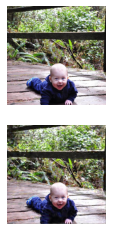

In [2]:
from numpy import load
from matplotlib import pyplot
# load the dataset
data = load('p2k_256.npz')
trainX, trainY, testX, testY = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainY.shape, testX.shape, testY.shape)
# plot source images
n_samples = 1
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(trainX[i].astype('uint8'))
# plot target image
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + n_samples + i)
	pyplot.axis('off')
	pyplot.imshow(trainY[i].astype('uint8'))
pyplot.show()